In [2]:
from seaborn import load_dataset
import seaborn as sns
import pandas_lightning

In [3]:
df = load_dataset("penguins")

In [4]:
df = df.cast(
    species="category",
    island="category",
    sex="category",
)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
Col = df.get_column_enum()

## Univariate

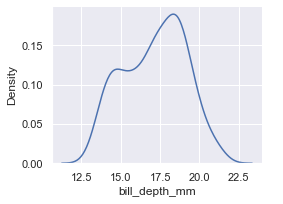

In [6]:
df.facet_grid().kdeplot(Col.bill_depth_mm)

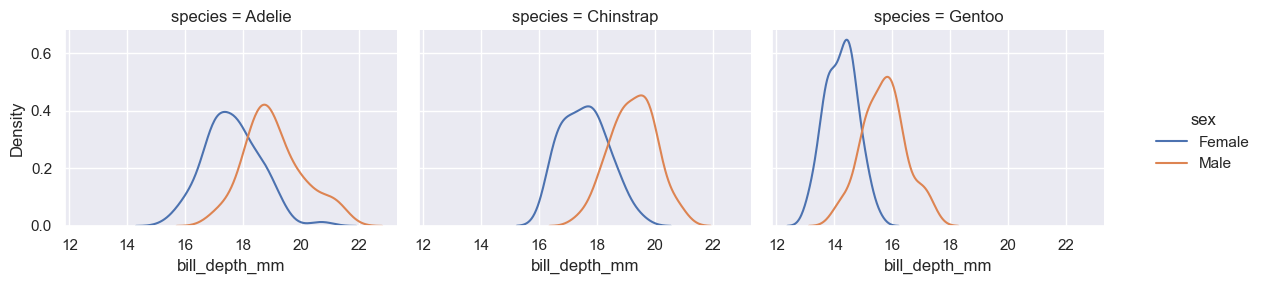

In [6]:
df.facet_grid(col_dim=Col.species, hue_dim=Col.sex).kdeplot(Col.bill_depth_mm)

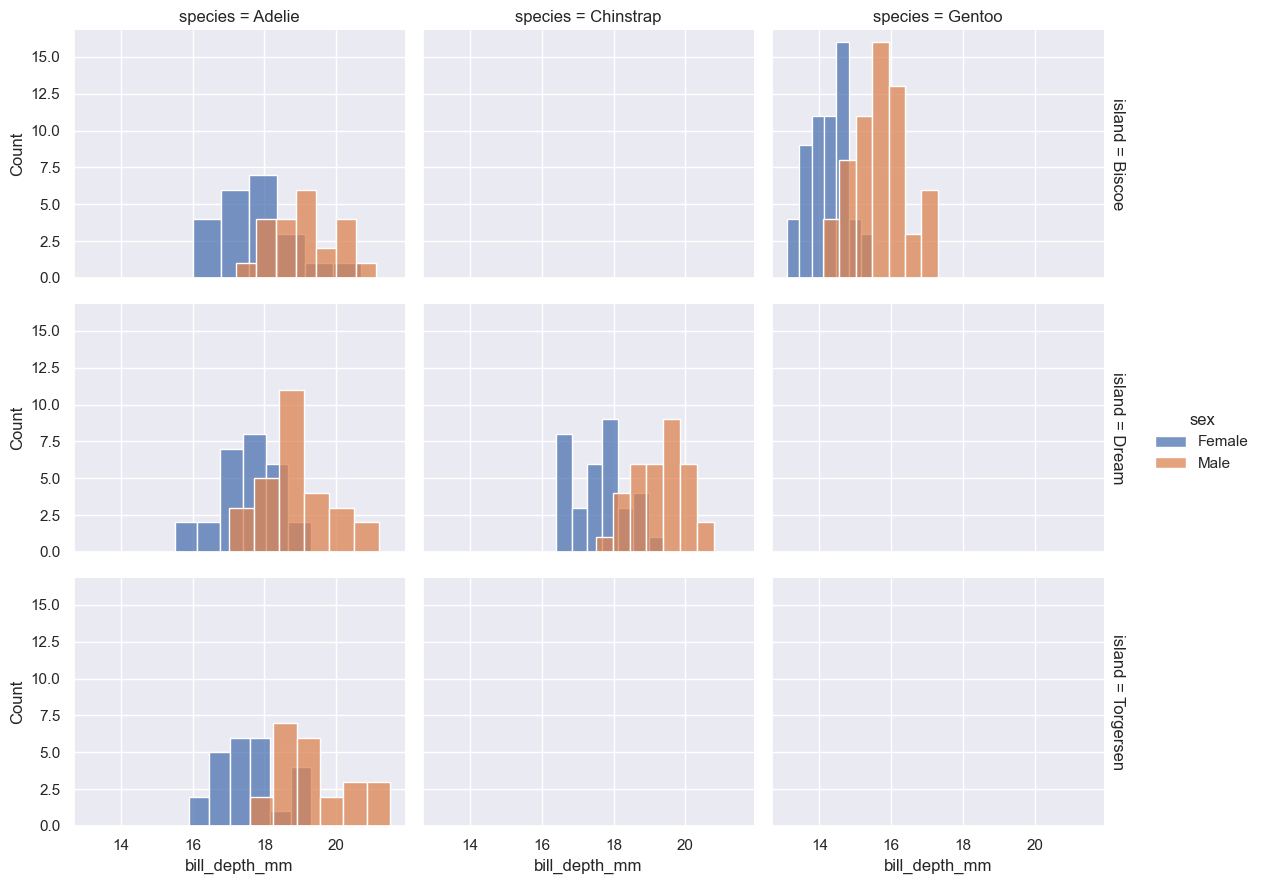

In [7]:
df.facet_grid(
    col_dim=Col.species, 
    hue_dim=Col.sex,
    row_dim=Col.island,
    
).histplot(
    Col.bill_depth_mm
)

## Bivariate

In [8]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


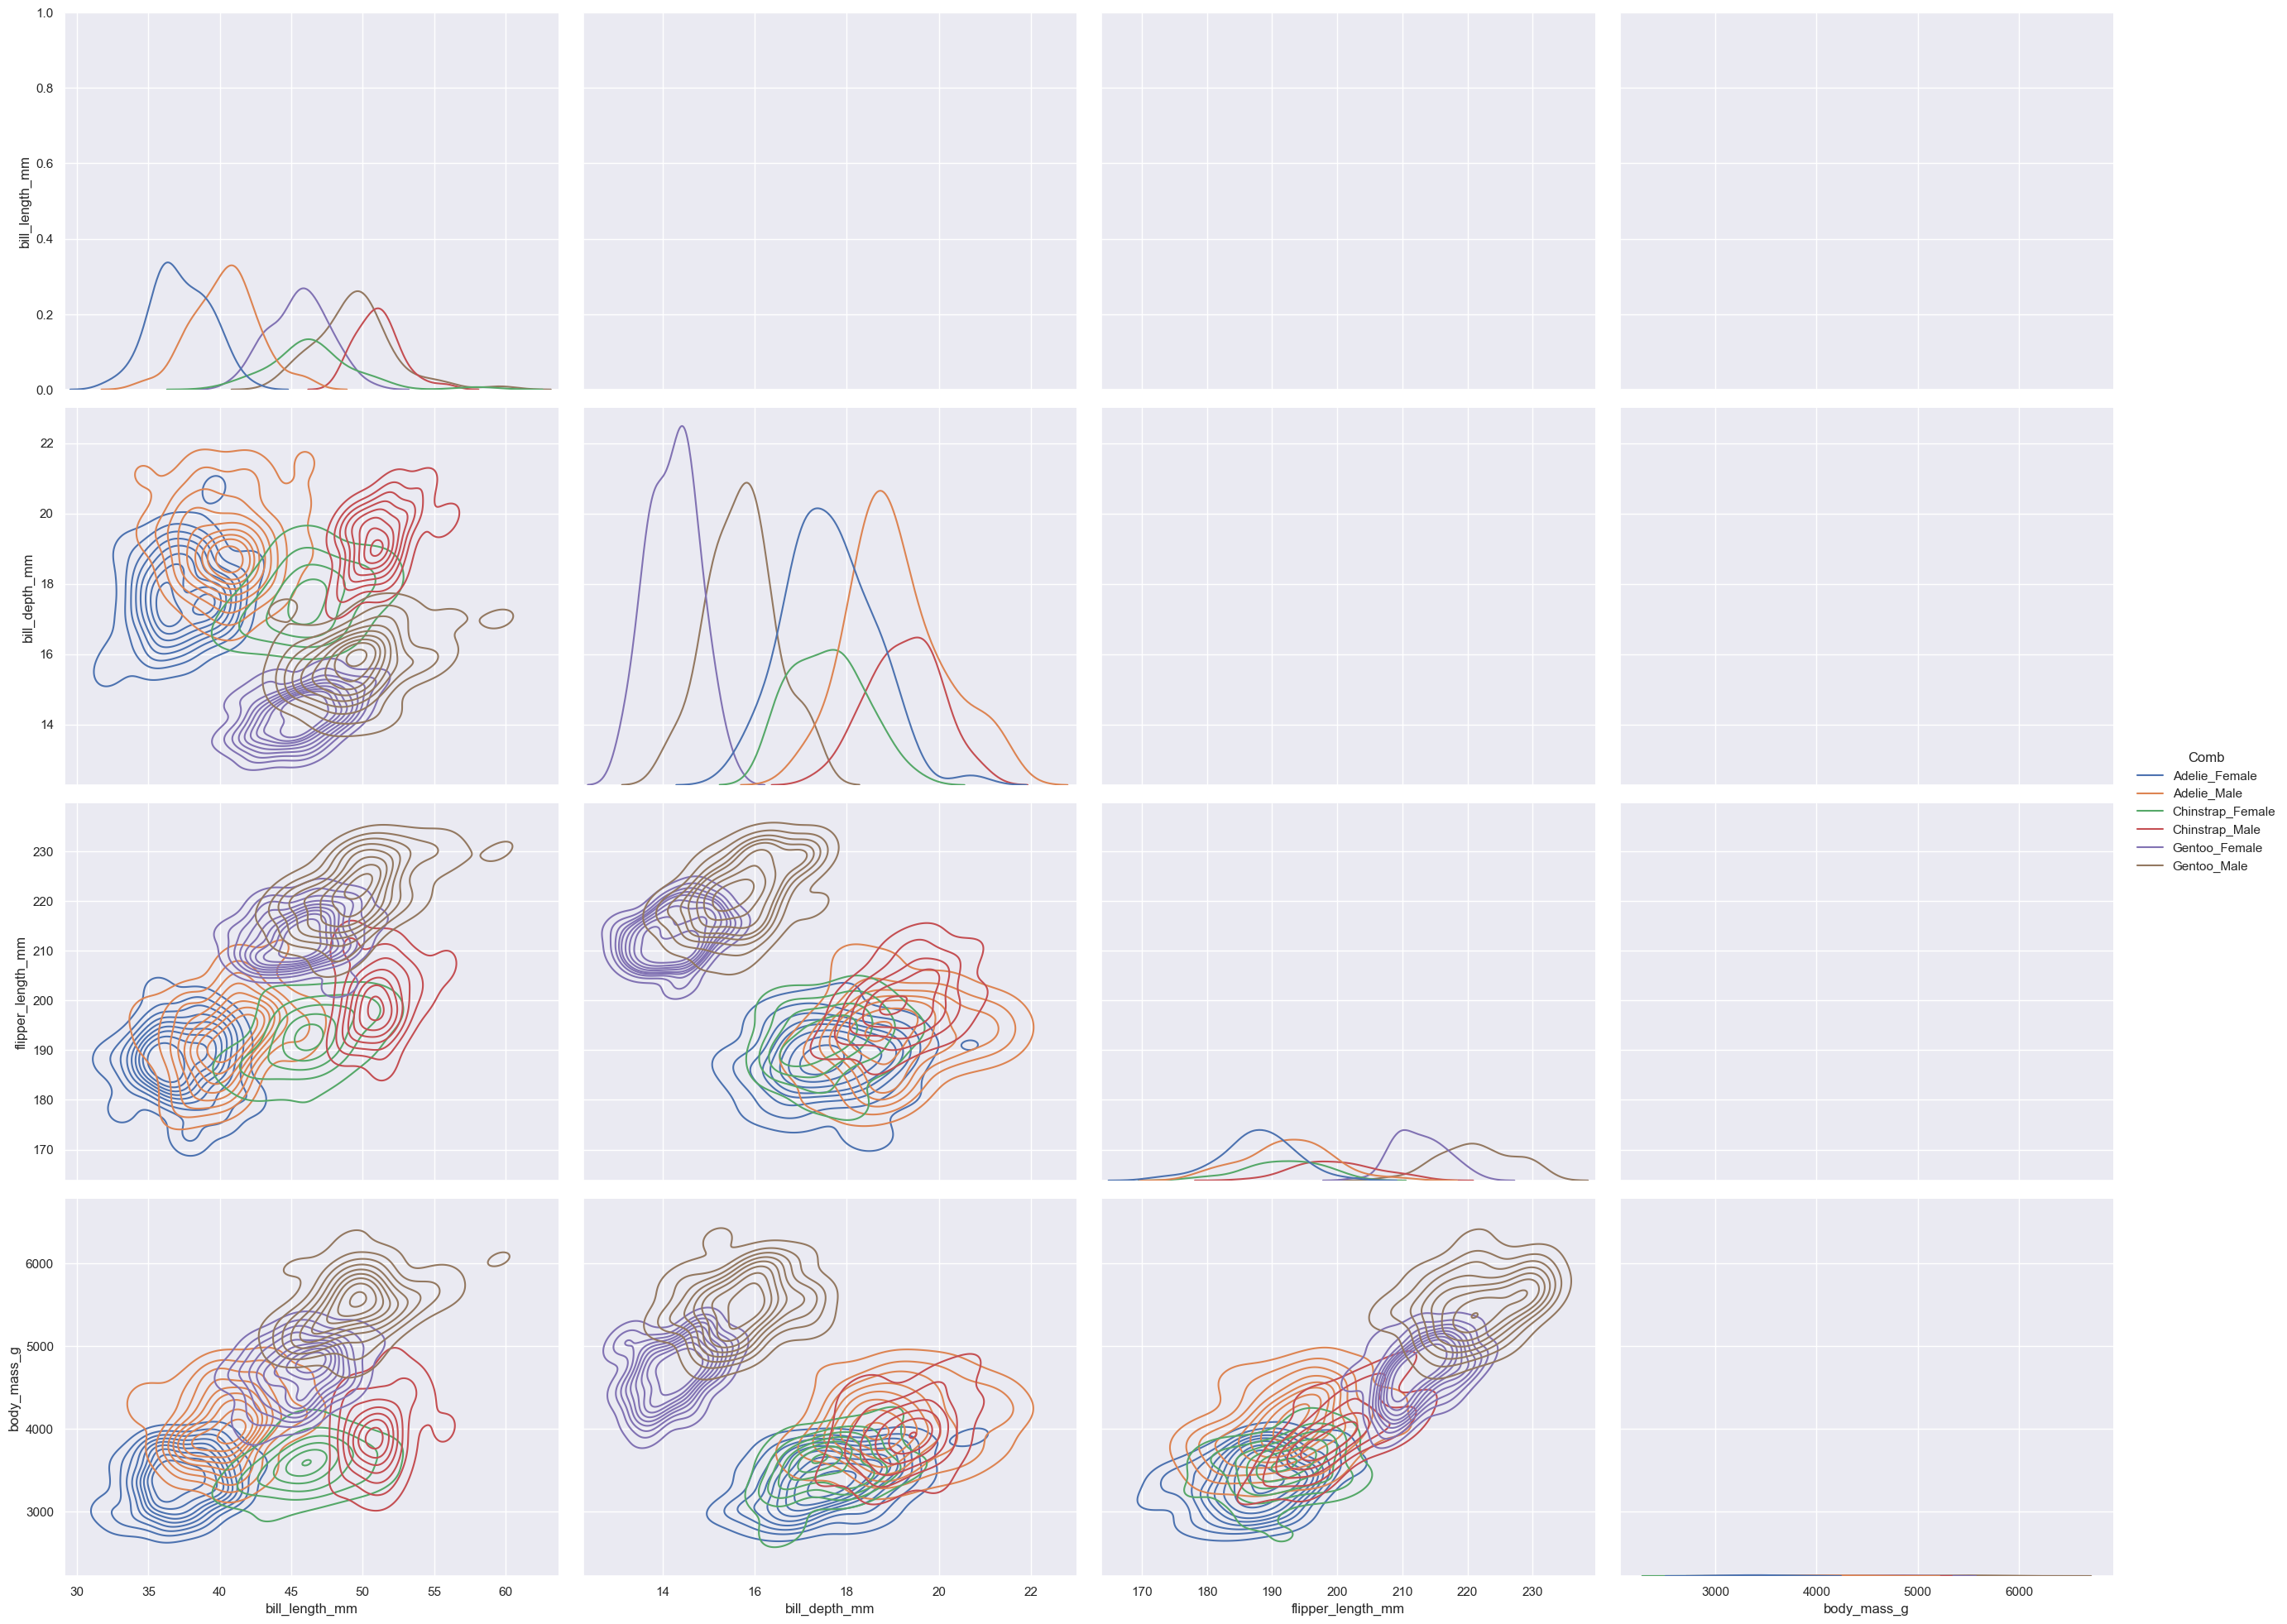

In [25]:
df.transform_columns(
    Comb=(["species","sex"], 
          lambda a,b: a.str.cat(b.values, sep="_").astype("category"))
).pair_grid(
    numeric_columns=None,
    hue_dim="Comb",
    height=5
).plot(
    lower=sns.kdeplot,
    diag=sns.kdeplot,
)

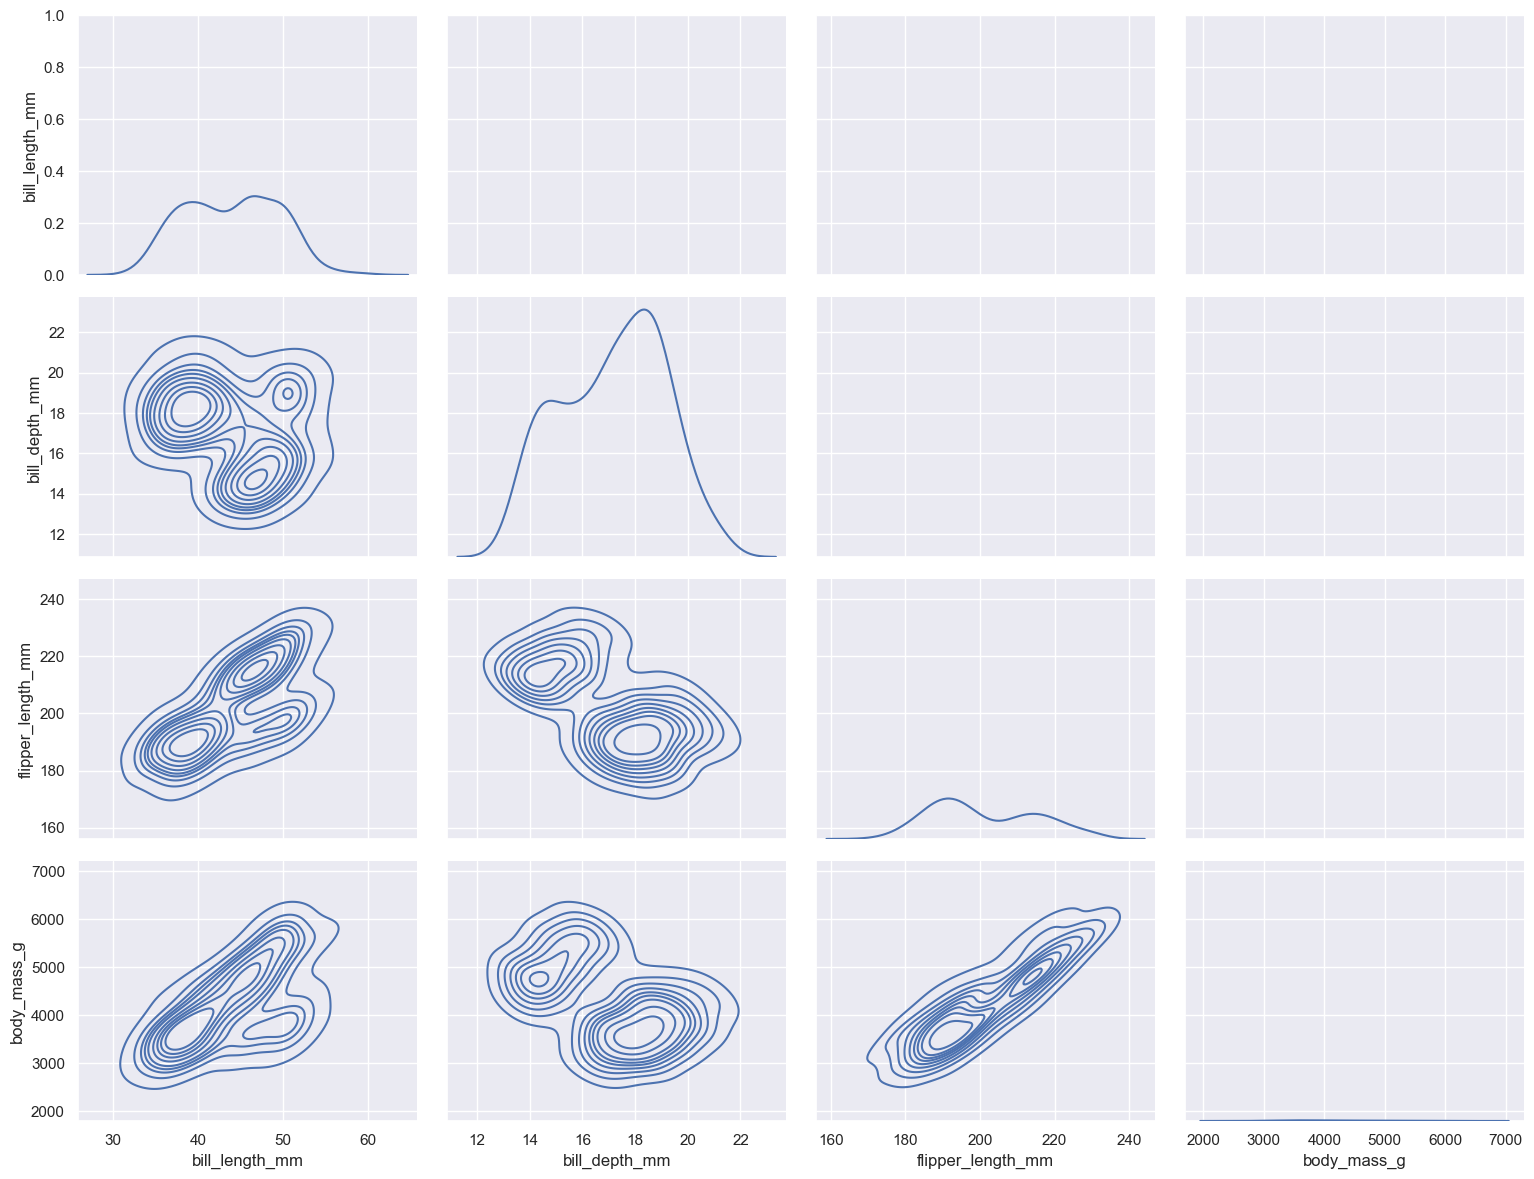

In [10]:
df.pair_grid(
    numeric_columns=None,
).plot(
    lower=sns.kdeplot,
    diag=sns.kdeplot,
)

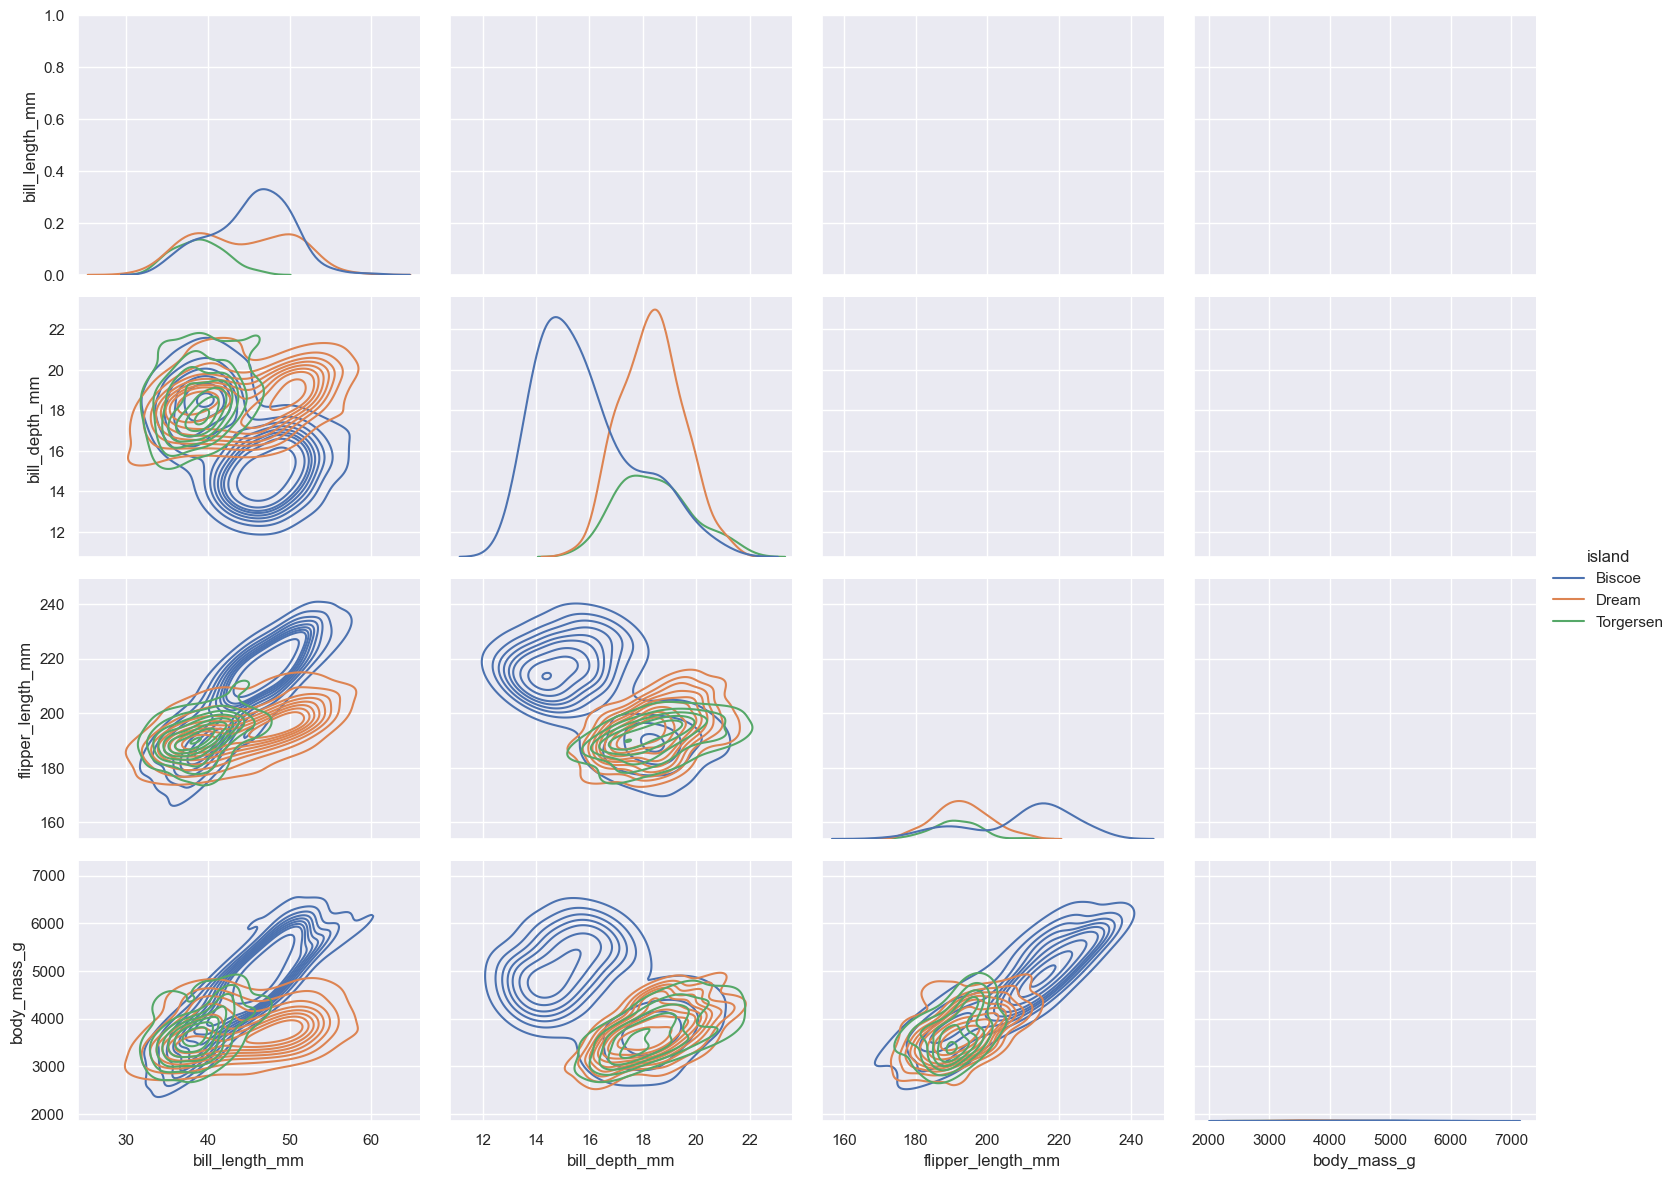

In [11]:
df.pair_grid(
    numeric_columns=None,
    hue_dim=Col.island
).plot(
    lower=sns.kdeplot,
    diag=sns.kdeplot,
)

## Multivariate

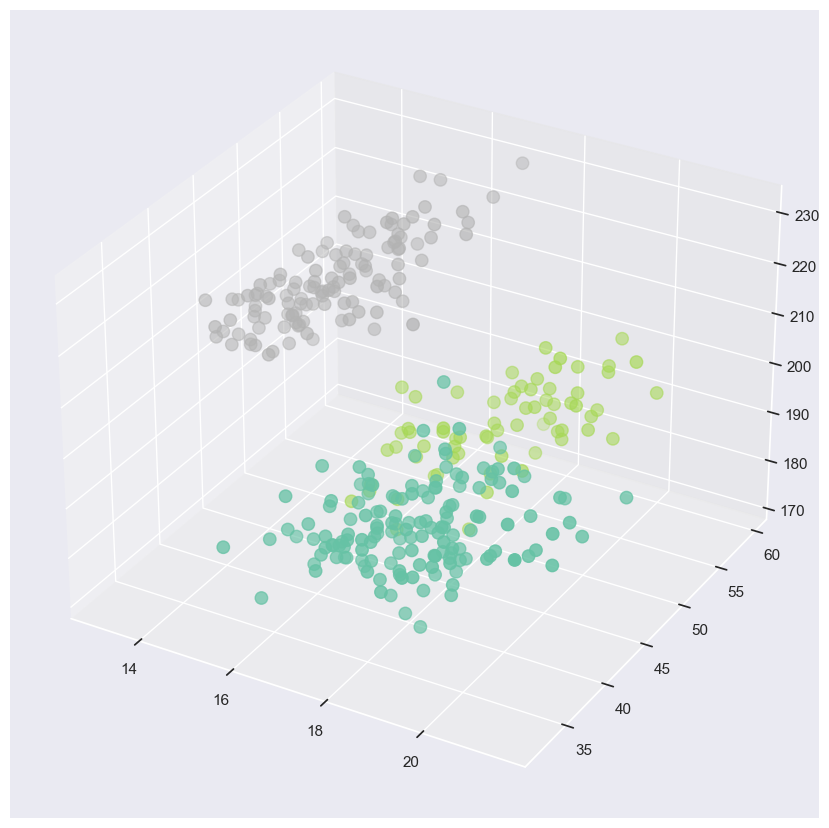

In [27]:
df.plot3d(
    x=Col.bill_depth_mm,
    y=Col.bill_length_mm,
    z=Col.flipper_length_mm,
    hue=Col.species
)